In [1]:
import cvxpy as cp
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt

## Multi-Task LASSO Problem
Our objective is to solve the multi-task lasso problem,
$$
\min \sum_{i=1}^{K} || v_i ||_{2} \\
\text{s.t. } Y = VX 
$$

Where, $X \in \mathbb{R}^{K \times N}$, $Y \in \mathbb{R}^{D \times N}$, $V \in \mathbb{R}^{D \times K}$ and $v_i$ are the columns of $V$.

We can represent this as a group LASSO problem by vectorizing $V$ column-wise to be $w = \text{vec}(V) \in \mathbb{R}^{KD}$ then the problem is re-written as,

$$
\min \sum_{i=1}^{K} || v_i ||_{2} \\
\text{s.t. } (X^{T} \bigotimes I_{d\times d}) w = \text{vec}(Y)
$$
Where every two element "sub-row" of this system corresponds to a different sample. We'll let
$$
Z = X^{T} \otimes I_{d\times d}
$$

In [2]:
def group_lasso_cvx(V):
    sum = 0
    for v_col in V.T:
        norm = cp.norm2(v_col)
        sum += norm
    return sum

In [3]:
def calc_group_lasso(V):
    act_cols = 0
    gl = 0
    for v_col in V.T:
        v_norm = np.linalg.norm(v_col)
        if v_norm > 1e-7:
            act_cols += 1
        gl += v_norm
    return gl, act_cols

In [4]:
def cvx_group_lasso(X,Y):
    d = Y.shape[0]
    n = Y.shape[1]
    k = X.shape[0]
    # Setup convex problem
    V_cp = cp.Variable((d,k))
    data_fitting_obj = group_lasso_cvx(V_cp)
    # play with tolerance
    objective = cp.Minimize(data_fitting_obj)
    constraint = [V_cp @ X == Y]
    prob = cp.Problem(objective, constraint)

    # Solve
    result = prob.solve()
    V_star = np.asarray(V_cp.value)

    GL_star, active_star = calc_group_lasso(V_star)

    print('Group LASSO: {} \nActive Columns: {}'.format(GL_star, active_star))
    
    return GL_star, active_star, V_star

In [5]:
def cvx_group_lasso_exps(D=5, N=30, K=300):
    iters = 100

    all_actives = []

    for i in range(iters):
        X = np.random.randn(K,N) #rank=n since n<k
        Y = np.random.randn(D,N) #rank=d since d<n

        GL, num_active, V = cvx_group_lasso(X,Y)
        all_actives.append(num_active)
        print('Done {}'.format(i), '\n')
    return all_actives

In [6]:
all_actives_D_10_N_10_K_500 = cvx_group_lasso_exps(D=10, N=10, K=500)
all_actives_D_10_N_20_K_500 = cvx_group_lasso_exps(D=10, N=20, K=500)
all_actives_D_10_N_30_K_500 = cvx_group_lasso_exps(D=10, N=30, K=500)
all_actives_D_10_N_40_K_500 = cvx_group_lasso_exps(D=10, N=40, K=500)

Group LASSO: 6.991791540470136 
Active Columns: 32
Done 0 

Group LASSO: 6.69181315264487 
Active Columns: 42
Done 1 

Group LASSO: 6.865024285230774 
Active Columns: 36
Done 2 

Group LASSO: 7.109678572069629 
Active Columns: 34
Done 3 

Group LASSO: 7.024008556243414 
Active Columns: 39
Done 4 

Group LASSO: 6.191317975446353 
Active Columns: 40
Done 5 

Group LASSO: 6.116612069793149 
Active Columns: 40
Done 6 

Group LASSO: 6.232854198319671 
Active Columns: 35
Done 7 

Group LASSO: 6.800268465056872 
Active Columns: 35
Done 8 

Group LASSO: 6.214387086930644 
Active Columns: 32
Done 9 

Group LASSO: 6.371845862745159 
Active Columns: 34
Done 10 

Group LASSO: 6.817026722686234 
Active Columns: 33
Done 11 

Group LASSO: 7.536289753896234 
Active Columns: 35
Done 12 

Group LASSO: 6.208295307080434 
Active Columns: 29
Done 13 

Group LASSO: 6.089152967933818 
Active Columns: 34
Done 14 

Group LASSO: 6.586875964925778 
Active Columns: 36
Done 15 

Group LASSO: 7.2372229782209345 
Ac

In [63]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib

plt.rc('text', usetex=False)
plt.rc('font', family='serif')

#plt.rc('text.latex', preamble=r'\usepackage{amsmath,bm,xfrac,mathrsfs}')

matplotlib.rcParams.update({'font.size': 16})

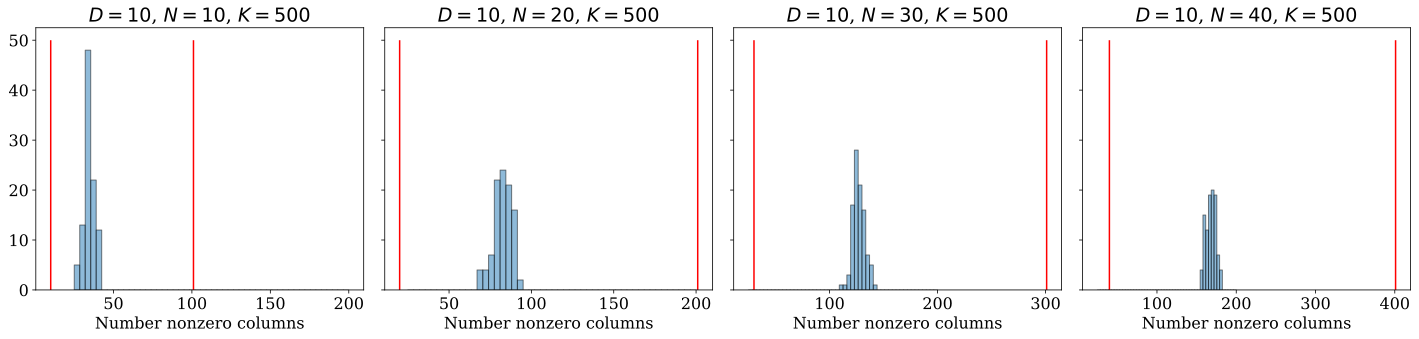

In [64]:
fig, axs = plt.subplots(1, 4, sharey=True, tight_layout=True, figsize=(20,5))
_,bins,_ = axs[0].hist(all_actives_D_10_N_10_K_500, bins=50,range=(25,200), edgecolor="black", alpha=0.5)
#axs[0].grid('on')
axs[0].set_title(r'$D=10$, $N=10$, $K=500$')
#print(np.min(all_actives_D_5_N_30_K_300))
#print(np.max(all_actives_D_5_N_30_K_300))
#axs[0].set_xticks(np.arange(20,200,50))
axs[0].set_xlabel(r'Number nonzero columns')
axs[0].vlines(10, 0, 50, colors='red')
axs[0].vlines(101, 0, 50, colors='red')
    
_,bins,_=axs[1].hist(all_actives_D_10_N_20_K_500, bins=50,range=(25,200), edgecolor="black", alpha=0.5)
#axs[1].grid('on')
axs[1].set_title(r'$D=10$, $N=20$, $K=500$')
#axs[1].set_xticks(bins)
axs[1].set_xlabel(r'Number nonzero columns')
axs[1].vlines(20, 0, 50, colors='red')
axs[1].vlines(201, 0, 50, colors='red')

_,bins,_=axs[2].hist(all_actives_D_10_N_30_K_500, bins=50,range=(25,200), edgecolor="black", alpha=0.5)
#axs[2].grid('on')
axs[2].set_title(r'$D=10$, $N=30$, $K=500$')
#axs[2].set_xticks(bins)
axs[2].set_xlabel(r'Number nonzero columns')
axs[2].vlines(30, 0, 50, colors='red')
axs[2].vlines(301, 0, 50, colors='red')


_,bins,_=axs[3].hist(all_actives_D_10_N_40_K_500, bins=50, range=(25,200), edgecolor="black", alpha=0.5)
#axs[3].grid('on')
axs[3].set_title(r'$D=10$, $N=40$, $K=500$')
#axs[3].set_xticks(bins)
axs[3].set_xlabel(r'Number nonzero columns')
axs[3].vlines(40, 0, 50, colors='red')
axs[3].vlines(401, 0, 50, colors='red')


plt.savefig('./figs/dimension_group_lasso.pdf', dpi=300)
                
plt.show()

## Subspace Version
Here we have that the columns of $X$ all live in a d-dim subspace of $\mathbb{R}^{k}$ so $rank(X) = d$

In [30]:
def cvx_group_lasso_exp_rank(D=10, N=15, K=300, r_x=3, r_y=5):
    iters = 100

    actives = []
    mses = []

    all_actives = []

    for t in range(iters):
        X = np.ones((K,N))

        U = np.random.randn(K, r_x) # rank d, the d columns are linearly independent w.h.p.

        V = np.random.randn(r_x, K)

        # Make rank(X) = r_x
        for i in range(N):
            b = np.random.randn(r_x,1)
            col_i = U @ b
            X[:,i,None] = (U @ b)

        Y = V @ X

        GL, num_active, V = cvx_group_lasso(X,Y)

        all_actives.append(num_active)
        print('Done iter {}'.format(t))
    
    return all_actives

In [31]:
all_actives_D_10_N_20_K_500_r_x_2 = cvx_group_lasso_exp_rank(D=10, N=20, K=200, r_x=2)
all_actives_D_10_N_20_K_200_r_x_5 = cvx_group_lasso_exp_rank(D=10, N=20, K=200, r_x=5)
all_actives_D_10_N_20_K_200_r_x_10 = cvx_group_lasso_exp_rank(D=10, N=20, K=200, r_x=10)
all_actives_D_10_N_20_K_200_r_x_20 = cvx_group_lasso_exp_rank(D=10, N=20, K=200, r_x=20)

Group LASSO: 3.80252737840555 
Active Columns: 3
Done iter 0
Group LASSO: 11.772436733521715 
Active Columns: 3
Done iter 1
Group LASSO: 7.077929063267113 
Active Columns: 3
Done iter 2
Group LASSO: 13.068202920068416 
Active Columns: 3
Done iter 3
Group LASSO: 14.876011084927084 
Active Columns: 3
Done iter 4
Group LASSO: 7.158119366488307 
Active Columns: 2
Done iter 5
Group LASSO: 4.802181464260474 
Active Columns: 3
Done iter 6
Group LASSO: 8.738775448791934 
Active Columns: 2
Done iter 7
Group LASSO: 8.378973715993823 
Active Columns: 3
Done iter 8
Group LASSO: 5.31452604564864 
Active Columns: 2
Done iter 9
Group LASSO: 13.61445195062199 
Active Columns: 2
Done iter 10
Group LASSO: 11.628307717352417 
Active Columns: 3
Done iter 11
Group LASSO: 8.525208914367674 
Active Columns: 2
Done iter 12
Group LASSO: 8.10667553269825 
Active Columns: 3
Done iter 13
Group LASSO: 11.33474877806459 
Active Columns: 2
Done iter 14
Group LASSO: 10.119941320668026 
Active Columns: 2
Done iter 15


/home/jshenouda/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1278: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Group LASSO: 38.969402800569405 
Active Columns: 110
Done iter 32
Group LASSO: 32.387681002789456 
Active Columns: 11
Done iter 33
Group LASSO: 46.28376147294961 
Active Columns: 11
Done iter 34
Group LASSO: 35.51174353324789 
Active Columns: 11
Done iter 35
Group LASSO: 37.41716030758138 
Active Columns: 10
Done iter 36
Group LASSO: 33.33630794861859 
Active Columns: 11
Done iter 37
Group LASSO: 44.68982702011784 
Active Columns: 12
Done iter 38
Group LASSO: 48.55072944582914 
Active Columns: 13
Done iter 39
Group LASSO: 46.392456853233725 
Active Columns: 10
Done iter 40
Group LASSO: 45.29508480877286 
Active Columns: 12
Done iter 41
Group LASSO: 52.50129376654575 
Active Columns: 12
Done iter 42
Group LASSO: 38.216736451886014 
Active Columns: 10
Done iter 43
Group LASSO: 40.07305410778529 
Active Columns: 10
Done iter 44
Group LASSO: 41.018330915869456 
Active Columns: 10
Done iter 45
Group LASSO: 39.413915343593146 
Active Columns: 11
Done iter 46
Group LASSO: 39.57610676263041 
A

2


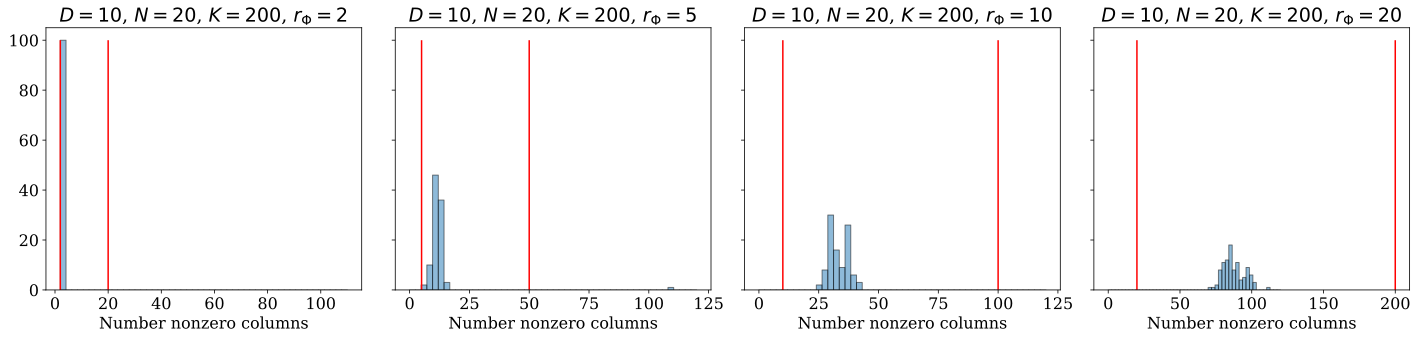

In [66]:
fig, axs = plt.subplots(1, 4, sharey=True, tight_layout=True, figsize=(20,5))

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


min_acts=np.min(all_actives_D_10_N_20_K_500_r_x_2)
print(min_acts)
max_acts=np.max(all_actives_D_10_N_20_K_500_r_x_2)
axs[0].hist(all_actives_D_10_N_20_K_500_r_x_2, bins=50,range=(2,110), edgecolor="black", alpha=0.5)
#axs[0].grid('on')
axs[0].set_title(r'$D=10$, $N=20$, $K=200$, $r_{\Phi}=2$')
#print(np.min(all_actives_D_5_N_30_K_300))
#print(np.max(all_actives_D_5_N_30_K_300))
#axs[0].set_xticks(range(min_acts,max_acts+1))
axs[0].vlines(2, 0, 100, colors='red')
axs[0].vlines(20, 0, 100, colors='red')
axs[0].set_xlabel(r'Number nonzero columns')

min_acts=np.min(all_actives_D_10_N_20_K_200_r_x_5)
max_acts=np.max(all_actives_D_10_N_20_K_200_r_x_5)
_,bins,_=axs[1].hist(all_actives_D_10_N_20_K_200_r_x_5, bins=50,range=(0,120), edgecolor="black", alpha=0.5)
#axs[1].grid('on')
axs[1].set_title(r'$D=10$, $N=20$, $K=200$, $r_{\Phi}=5$')
#axs[1].set_xticks(bins)
axs[1].vlines(5, 0, 100, colors='red')
axs[1].vlines(50, 0, 100, colors='red')
axs[1].set_xlabel(r'Number nonzero columns')


min_acts=np.min(all_actives_D_10_N_20_K_200_r_x_10)
max_acts=np.max(all_actives_D_10_N_20_K_200_r_x_10)
_,bins,_=axs[2].hist(all_actives_D_10_N_20_K_200_r_x_10, bins=50,range=(0,120), edgecolor="black", alpha=0.5)
#axs[2].grid('on')
axs[2].set_title(r'$D=10$, $N=20$, $K=200$, $r_{\Phi}=10$')
#axs[2].set_xticks(bins)
axs[2].vlines(10, 0, 100, colors='red')
axs[2].vlines(100, 0, 100, colors='red')
axs[2].set_xlabel(r'Number nonzero columns')


min_acts=np.min(all_actives_D_10_N_20_K_200_r_x_20)
max_acts=np.max(all_actives_D_10_N_20_K_200_r_x_20)
_,bins,_ =axs[3].hist(all_actives_D_10_N_20_K_200_r_x_20, bins=50,range=(0,120), edgecolor="black", alpha=0.5)
#axs[3].grid('on')
axs[3].set_title(r'$D=10$, $N=20$, $K=200$, $r_{\Phi}=20$')
#axs[3].set_xticks(bins)
axs[3].vlines(20, 0, 100, colors='red')
axs[3].vlines(200, 0, 100, colors='red')
axs[3].set_xlabel(r'Number nonzero columns')


#fig.suptitle('Distribution of Active Columns', fontsize=16)

plt.savefig('./figs/rank_group_lasso.pdf', dpi=300)
                
plt.show()